<a href="https://colab.research.google.com/github/dlvvkfl88/MSAISCHOOL/blob/main/MS_AI_SCHOOL_59%EC%9D%BC%EC%B0%A8_%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 인공신경망 - 경사 하강법을 이용한 선형 회귀모델 학습

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### 데이터 , 타겟 데이터 생성 ,y=2x + 1 관계를 따르는 데이터 생성

In [ ]:
x = np.array([1,2,3,4,5])
y = np.array([3,5,7,8,11])



### 모델 예측갑ㄳ과 실제값 사이 오차를 계산하는 함수를 정의

In [ ]:
def compute_error(w0, w1, x,y):
  y_pred = w0 + w1 * x
  error = y - y_pred

  return error

### 경사 하강법을 수행하는 함수 정의

In [ ]:
def gradient_descent(x,y, lr=0.05, iterations=1000):
  n = len(x)
  w0,w1 =0,0

  for i in range(iterations):
    error = compute_error(w0,w1,x,y)
    w0 -= lr *(-2.0/n) * np.sum(error)
    w1 -= lr *(-2.0/n) * np.sum(error*x)

  return w0,w1

### 경사 하강법 이용한 선형 회귀 모델 구현

In [ ]:
w0 ,w1 = gradient_descent(x,y)
print(w0,w1)

1.099999979002089 1.9000000058160846


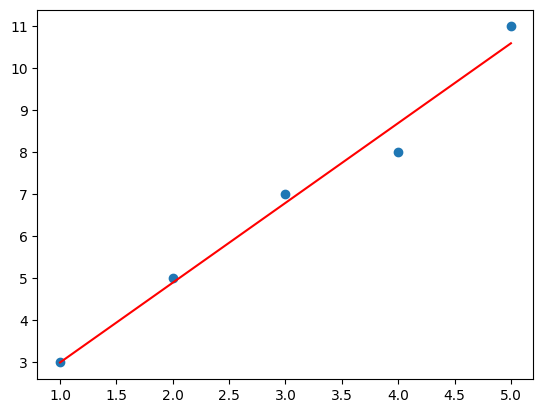

In [ ]:
plt.scatter(x,y)
plt.plot(x, w0+w1*x , color='red')
plt.show()

# 다중 선형 - 실습 : 경사 하강법을 이용한 다중 선형회귀

In [ ]:
import numpy as np

## 데이터 생성

In [ ]:
x1 = np.array([1,2,3,4,5])
x2 = np.array([0,1,0,1,0])

y = np.array([3,5,7,9,11])


In [ ]:
def gradient_descent(x1,x2,y,lr,iterations):
  # 초기값 생성
  n = len(y)
  beta_0 = 0
  beta_1 = 0
  beta_2 = 0

  # 경사하강ㅂ접 수행
  for i in range(iterations):
    y_pred = beta_0 + beta_1*x1 + beta_2*x2
    error = y_pred -y

    # 업데이트
    beta_0 -= lr * (1/n) *np.sum(error)
    beta_1 -= lr * (1/n) *np.sum(error * x1)
    beta_2 -= lr * (1/n) *np.sum(error * x2)

  return beta_0 , beta_1 , beta_2

In [ ]:
beta_0 , beta_1 , beta_2 = gradient_descent(x1,x2,y,0.01, 1000)

print("beta_0 ", beta_0)
print("beta_1 ", beta_1)
print("beta_2 ", beta_2)

beta_0  0.8907546215358821
beta_1  2.0237699271134932
beta_2  0.057888309859129156


In [ ]:
x1_new = 2
x2_new = 1

y_pred_temp  = beta_0 + beta_1*x1_new + beta_2*x2_new

print("예측 y값" , y_pred_temp)

예측 y값 4.996182785621997


## 선형 회귀 모델 실제 활용 사례

# 보스턴 주택 집값 데이터셋

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
boston = pd.read_csv('/content/boston_house_prices.csv')
print(boston)

         506  13 Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6  \
0       CRIM  ZN      INDUS       CHAS        NOX         RM        AGE   
1    0.00632  18       2.31          0      0.538      6.575       65.2   
2    0.02731   0       7.07          0      0.469      6.421       78.9   
3    0.02729   0       7.07          0      0.469      7.185       61.1   
4    0.03237   0       2.18          0      0.458      6.998       45.8   
..       ...  ..        ...        ...        ...        ...        ...   
502  0.06263   0      11.93          0      0.573      6.593       69.1   
503  0.04527   0      11.93          0      0.573       6.12       76.7   
504  0.06076   0      11.93          0      0.573      6.976         91   
505  0.10959   0      11.93          0      0.573      6.794       89.3   
506  0.04741   0      11.93          0      0.573       6.03       80.8   

    Unnamed: 7 Unnamed: 8 Unnamed: 9 Unnamed: 10 Unnamed: 11 Unnamed: 12  \
0          DIS        R

In [ ]:
df = boston.rename(columns=boston.iloc[0]) # 첫번째 행을 컬럼으로 rename으로
df = df.drop(df.index[0]) # 그후 컬럼과 중복되는 첫행 삭제
print(df)

        CRIM  ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD  TAX PTRATIO  \
1    0.00632  18   2.31    0  0.538  6.575  65.2    4.09   1  296    15.3   
2    0.02731   0   7.07    0  0.469  6.421  78.9  4.9671   2  242    17.8   
3    0.02729   0   7.07    0  0.469  7.185  61.1  4.9671   2  242    17.8   
4    0.03237   0   2.18    0  0.458  6.998  45.8  6.0622   3  222    18.7   
5    0.06905   0   2.18    0  0.458  7.147  54.2  6.0622   3  222    18.7   
..       ...  ..    ...  ...    ...    ...   ...     ...  ..  ...     ...   
502  0.06263   0  11.93    0  0.573  6.593  69.1  2.4786   1  273      21   
503  0.04527   0  11.93    0  0.573   6.12  76.7  2.2875   1  273      21   
504  0.06076   0  11.93    0  0.573  6.976    91  2.1675   1  273      21   
505  0.10959   0  11.93    0  0.573  6.794  89.3  2.3889   1  273      21   
506  0.04741   0  11.93    0  0.573   6.03  80.8   2.505   1  273      21   

          B LSTAT  MEDV  
1     396.9  4.98    24  
2     396.9  9.14  21.6

In [ ]:
df['target'] = df['MEDV']
df = df.drop(['MEDV'],axis=1)

In [ ]:
df = df.astype('float') # 자료형 변환 되었는지 꼭확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 1 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


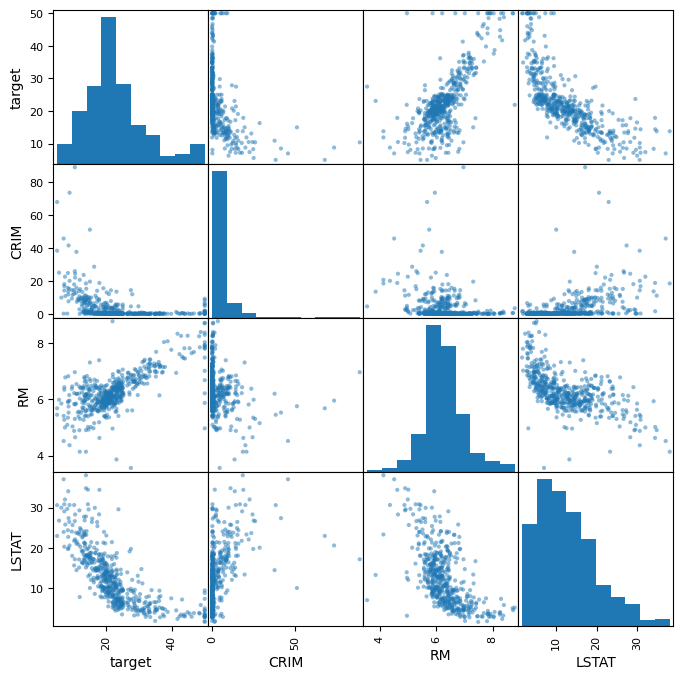

In [ ]:
# 주택 가격과 다른 변수들 간의 상관관계 시각화
pd.plotting.scatter_matrix(df[['target','CRIM','RM','LSTAT']], figsize=(8,8), diagonal='hist')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#  데이터 로드

x = df.loc[:, [col for col in df.columns if col != "target"]] # target 제외 모든변수

y = df['target']
y = y.to_numpy()

# 데이터 전처리
scaler = StandardScaler()
x =scaler.fit_transform(x)
y = y.reshape(-1,1)

# 데이터셋 분리
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=0.2, random_state=1)

#print(len(x_train), len(x_test) , len(y_train), len(y_test))
#print(x_train , y_train)

# 선형회귀 모델 정의

In [ ]:
x_train.shape[1] # 입력변수 확인

13

In [ ]:
import torch
class LinearRegression(torch.nn.Module):
  def __init__(self):
    super(LinearRegression,self).__init__()
    self.linear = torch.nn.Linear(x_train.shape[1], 1 ) # 예측변수 13개 결과 아웃풋1개

  def forward(self, x ):
    out = self.linear(x)
    return out

## 모델학습

In [ ]:
model = LinearRegression()

# loss 함수 지정
criterion = torch.nn.MSELoss()

# 옵티마이저 지정
optimizer = torch.optim.SGD(model.parameters(), lr=0.00025)

for epoch in range(10000):
  inputs = torch.autograd.Variable(torch.from_numpy(x_train).float())
  labels = torch.autograd.Variable(torch.from_numpy(y_train).float())

  optimizer.zero_grad()
  outputs = model(inputs)
  loss= criterion(outputs, labels)
  loss.backward()
  optimizer.step()

  if epoch % 100 == 0:
    print("epoch {}, loss {}".format(epoch, loss.item()))

epoch 0, loss 602.8065185546875
epoch 100, loss 533.205078125
epoch 200, loss 477.00457763671875
epoch 300, loss 429.7921447753906
epoch 400, loss 389.0305480957031
epoch 500, loss 353.20294189453125
epoch 600, loss 321.35491943359375
epoch 700, loss 292.8460693359375
epoch 800, loss 267.2174987792969
epoch 900, loss 244.11827087402344
epoch 1000, loss 223.26560974121094
epoch 1100, loss 204.4222869873047
epoch 1200, loss 187.3842315673828
epoch 1300, loss 171.97174072265625
epoch 1400, loss 158.02584838867188
epoch 1500, loss 145.40438842773438
epoch 1600, loss 133.97950744628906
epoch 1700, loss 123.63622283935547
epoch 1800, loss 114.27084350585938
epoch 1900, loss 105.78995513916016
epoch 2000, loss 98.10909271240234
epoch 2100, loss 91.15191650390625
epoch 2200, loss 84.849609375
epoch 2300, loss 79.13951873779297
epoch 2400, loss 73.96552276611328
epoch 2500, loss 69.27671813964844
epoch 2600, loss 65.02696990966797
epoch 2700, loss 61.1746826171875
epoch 2800, loss 57.6821861267

## 모델 평가

In [ ]:
import numpy as np
import torch

model.eval() # 평가모드로 진행

# 이전버전
#x_test = torch.autograd.Variable(torch.from_numpy(x_test).float())
#y_test = torch.autograd.Variable(torch.from_numpy(y_test).float())


#최신버전 변경된 버전
x_test = torch.from_numpy(x_test).float()
y_test = torch.from_numpy(y_test).float()
y_pred = model(x_test)

mse = criterion(y_pred, y_test)
rmse = np.sqrt(mse.item())
print("RMSE >>", rmse)

RMSE >> 4.802586438792663


# 실제 집값과 예측한 집값 차이 비교

In [ ]:
with torch.no_grad(): # 자동 미분방지 ->비활성화 ->모델추론
  x_sample = x_test[0]
  y_true = y_test[0].item()
  y_pred = model(x_sample).item()

  print(f"실제집값 : {y_true}, 예측집값 : {y_pred:.2f}")

실제집값 : 28.200000762939453, 예측집값 : 30.40


## 선형 회귀 모델 학습에서 다양한 옵티마이저 해보기

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Boston data loader

In [4]:
boston = pd.read_csv('/content/boston_house_prices.csv')
print(boston)

         506  13 Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6  \
0       CRIM  ZN      INDUS       CHAS        NOX         RM        AGE   
1    0.00632  18       2.31          0      0.538      6.575       65.2   
2    0.02731   0       7.07          0      0.469      6.421       78.9   
3    0.02729   0       7.07          0      0.469      7.185       61.1   
4    0.03237   0       2.18          0      0.458      6.998       45.8   
..       ...  ..        ...        ...        ...        ...        ...   
502  0.06263   0      11.93          0      0.573      6.593       69.1   
503  0.04527   0      11.93          0      0.573       6.12       76.7   
504  0.06076   0      11.93          0      0.573      6.976         91   
505  0.10959   0      11.93          0      0.573      6.794       89.3   
506  0.04741   0      11.93          0      0.573       6.03       80.8   

    Unnamed: 7 Unnamed: 8 Unnamed: 9 Unnamed: 10 Unnamed: 11 Unnamed: 12  \
0          DIS        R

In [5]:
df = boston.rename(columns=boston.iloc[0]) # 첫번째 행을 컬럼으로 rename으로
df = df.drop(df.index[0]) # 그후 컬럼과 중복되는 첫행 삭제
print(df)

        CRIM  ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD  TAX PTRATIO  \
1    0.00632  18   2.31    0  0.538  6.575  65.2    4.09   1  296    15.3   
2    0.02731   0   7.07    0  0.469  6.421  78.9  4.9671   2  242    17.8   
3    0.02729   0   7.07    0  0.469  7.185  61.1  4.9671   2  242    17.8   
4    0.03237   0   2.18    0  0.458  6.998  45.8  6.0622   3  222    18.7   
5    0.06905   0   2.18    0  0.458  7.147  54.2  6.0622   3  222    18.7   
..       ...  ..    ...  ...    ...    ...   ...     ...  ..  ...     ...   
502  0.06263   0  11.93    0  0.573  6.593  69.1  2.4786   1  273      21   
503  0.04527   0  11.93    0  0.573   6.12  76.7  2.2875   1  273      21   
504  0.06076   0  11.93    0  0.573  6.976    91  2.1675   1  273      21   
505  0.10959   0  11.93    0  0.573  6.794  89.3  2.3889   1  273      21   
506  0.04741   0  11.93    0  0.573   6.03  80.8   2.505   1  273      21   

          B LSTAT  MEDV  
1     396.9  4.98    24  
2     396.9  9.14  21.6

In [6]:
df['target'] = df['MEDV']
df = df.drop(['MEDV'],axis=1)

In [7]:
df = df.astype('float') # 자료형 변환 되었는지 꼭확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 1 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#  데이터 로드

x = df.loc[:, [col for col in df.columns if col != "target"]] # target 제외 모든변수

y = df['target']
y = y.to_numpy()

# 데이터 전처리
scaler = StandardScaler()
x =scaler.fit_transform(x)
y = y.reshape(-1,1)

# 데이터셋 분리
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=0.1, random_state=1)



In [12]:
#print(len(x_train), len(x_test) , len(y_train), len(y_test))
#print(x_train , y_train)

## 모델 생성 및 하이퍼파라미터 설정

In [17]:
print(x.shape)
# 하이퍼 파라미터 생성
input_dim = x.shape[1] # 13
output_dim = 1
lr = 0.0001
epochs = 1000

# 모델 생성
model = nn.Linear(input_dim , output_dim)

(506, 13)


# 다양한 옵티마이저 설정

In [18]:
optimizers = {"SGD":optim.SGD(model.parameters(), lr=lr),
              "Momentum" : optim.SGD(model.parameters(), lr=lr, momentum=0.9),
              "Adagrad": optim.Adagrad(model.parameters(), lr=lr),
              "RMSprop": optim.RMSprop(model.parameters(), lr=lr),
              "Adam" : optim.Adam(model.parameters(), lr=lr)}

### 모델 학습|

In [22]:
for optimizer_name , optimizer in optimizers.items():
  #print(optimizer_name,optimizer)
  criterion = nn.MSELoss()
  optimizer.zero_grad()

  for epoch in range(epochs):
    inputs = torch.tensor(x_train, dtype=torch.float32)
    labels = torch.tensor(y_train, dtype=torch.float32)

    # forward pass
    outputs = model(inputs)
    loss = criterion(outputs, labels)

    # backward and optimizer
    loss.backward()
    optimizer.step()

    # print progress
    if (epoch + 1) % 100 == 0 :
      print(f"{optimizer_name} - epoch [{epoch+1}/{epochs}, :pss :{loss.item():.4f}]")



SGD - epoch [100/1000, :pss :49030675632383707840512.0000]
SGD - epoch [200/1000, :pss :31643952810167604609024.0000]
SGD - epoch [300/1000, :pss :12262645385684171358208.0000]
SGD - epoch [400/1000, :pss :834579005815373430784.0000]
SGD - epoch [500/1000, :pss :3225424291402197499904.0000]
SGD - epoch [600/1000, :pss :18208038656760126373888.0000]
SGD - epoch [700/1000, :pss :38092301332228855562240.0000]
SGD - epoch [800/1000, :pss :52672241255079217201152.0000]
SGD - epoch [900/1000, :pss :54464408194394659749888.0000]
SGD - epoch [1000/1000, :pss :42548977955081778364416.0000]
Momentum - epoch [100/1000, :pss :1673368718530451410518016.0000]
Momentum - epoch [200/1000, :pss :36269128118285283679535104.0000]
Momentum - epoch [300/1000, :pss :4931775102186016761052135424.0000]
Momentum - epoch [400/1000, :pss :5026094587937985418290830245888.0000]
Momentum - epoch [500/1000, :pss :1122627858907258485698950332416000.0000]
Momentum - epoch [600/1000, :pss :10748033105563214339686977144

## 선형분류 - 로지스틱 회귀

In [23]:
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from torch.utils.data import Dataset , DataLoader

### 데이터셋을 만들기 make_classification 함수를 사용하여 무작위 데이터셋 만들기

In [24]:
x,y = make_classification(
    n_samples=3000,
    n_features=5,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=42

)

print(x,y)

[[-0.02439857 -0.57540077  1.26796049 -1.42222965 -0.9629849 ]
 [-1.07638119  0.3872175   1.08299994 -0.67379011 -2.65098736]
 [-1.12984986 -0.26922916  1.12735009 -0.82383687 -1.70574586]
 ...
 [-0.53797853  0.26401859 -0.48915618  0.4664446  -1.57451325]
 [ 0.01920342  0.9761859  -0.14717165 -1.51725386  2.31873002]
 [-0.37051336  0.93603022 -0.62133172 -0.23084897  1.66473405]] [0 0 0 ... 0 1 1]


## 데이터셋 트레인 ,테스트 로 나누기

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

print("x_train >>", len(x_train))
print("x_test >>", len(x_test))
print("y_train >>", len(y_train))
print("y_test >>", len(y_test))

x_train >> 2400
x_test >> 600
y_train >> 2400
y_test >> 600


### Pytorch의 데이터셋 데이터 로더 사용 위한 커스텀데이터셋 구현

In [39]:
class MyCustomDataset(Dataset):

  def __init__(self, x,y):
    # 학습위해 텐서로 변환
    self.x = torch.tensor(x, dtype=torch.float32)
    self.y = torch.tensor(y, dtype=torch.float32)
    print(self.x, self.y)


  def __getitem__(self,index):

    return self.x[index], self.y[index]

    pass
  def __len__(self):
    return len(self.x)

# 데이타셋 정의
train_dataset = MyCustomDataset(x_train , y_train)
test_dataset = MyCustomDataset(x_test, y_test)

# 데이터 로드 정의
train_loader = DataLoader(train_dataset, batch_size=32 , shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32 , shuffle=False)
# 디버깅 코드###
# test = MyCustomDataset(x_test, y_test)

# for i in test:
#   print(i)
for index, (datas, labels) in enumerate(test_loader):
  print(index, datas, labels)


tensor([[ 0.7075,  1.2127, -0.6756,  0.3749,  0.7775],
        [-0.1092,  0.8279,  0.4622,  1.1346,  0.0994],
        [-1.8629,  0.1843,  0.8259, -0.5348,  1.6433],
        ...,
        [ 1.6923,  0.9449, -1.3617, -0.2597,  0.3556],
        [-0.8839,  1.9900,  1.6815,  0.1473, -0.2362],
        [-0.1104,  0.1290,  0.3199, -0.1956,  0.9334]]) tensor([1., 1., 1.,  ..., 1., 0., 1.])
tensor([[-0.1814,  0.9541, -0.8362,  0.9478,  1.1666],
        [-1.0747, -0.5975, -0.0673, -0.7824, -1.8099],
        [ 2.0192,  1.4252,  0.7749,  0.9027,  0.9276],
        ...,
        [ 1.1968,  1.1594,  1.5280,  0.4321,  0.3262],
        [-0.0243,  0.9452,  1.2092,  1.6390, -0.5826],
        [ 0.5011,  1.5814,  1.5891, -0.4866, -0.2943]]) tensor([1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1.,
        1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
        1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 1., 0., 0

## 모델 정의

In [53]:
class LogisticRegression(nn.Module):
  def __init__(self, input_dim):
    super(LogisticRegression, self).__init__()
    self.linear = nn.Linear(input_dim,1)

  def forward(self, x):
    out = self.linear(x)
    out = torch.sigmoid(out)

    return out

model = LogisticRegression(input_dim=5)

print(model)


LogisticRegression(
  (linear): Linear(in_features=5, out_features=1, bias=True)
)


## 모델을 학습시키기 전 학습에 필요한 Loss Function , optimizer 선언

In [55]:
pip install adamp

  Preparing metadata (setup.py) ... done
  Created wheel for adamp: filename=adamp-0.3.0-py3-none-any.whl size=5980 sha256=155294a97e35cc2e1e2b656f8119d949b444644e92be7222a27f29ed01c2a311
  Stored in directory: /root/.cache/pip/wheels/c7/ad/0f/b41b1c45b18c66e5eef5d2254415af8055c7e2b0934145157d
Successfully built adamp


In [61]:
from adamp import SGDP

criterion = nn.BCELoss() # 사용한 이유는 0과 1 분류 이진분류 하기 때문입니다.
optimizer = SGDP(model.parameters(), lr=0.01, weight_decay = 1e-5 , momentum=0.9 , nesterov=True)
optimizer_1 = optim.SGD(model.parameters(), lr=0.01, weight_decay = 1e-5 , momentum=0.9 , nesterov=True)
print(optimizer)

SGDP (
Parameter Group 0
    dampening: 0
    delta: 0.1
    eps: 1e-08
    lr: 0.01
    momentum: 0.9
    nesterov: True
    wd_ratio: 0.1
    weight_decay: 1e-05
)


### Train loop 구현

In [62]:
# 얼마만큼 돌릴꺼냐
num_epochs = 100
for epoch in range(num_epochs):
  for inputs, targets in train_loader:
    # print(targets)
    # print("unsqueeze>> ", targets.unsqueeze(1))
    # 옵티마이저 초기화 진행
    optimizer_1.zero_grad()

    outputs = model(inputs)
    loss = criterion(outputs, targets.unsqueeze(1))
    loss.backward()

    optimizer_1.step()
    #loss = criterion(outputs, targets.unsqueeze(1))

  if epoch % 10 ==0:
    print(f"epoch:{epoch+1}/{num_epochs}, Loss : {loss.item():.4f}")

""" SGDP로 돌릴때
epoch:1/100, Loss : 0.1353
epoch:11/100, Loss : 0.1972
epoch:21/100, Loss : 0.3054
epoch:31/100, Loss : 0.2681
epoch:41/100, Loss : 0.1706
epoch:51/100, Loss : 0.2328
epoch:61/100, Loss : 0.3620
epoch:71/100, Loss : 0.2956
epoch:81/100, Loss : 0.1078
epoch:91/100, Loss : 0.0980
"""
""" optim.sgd로 돌릴떄
epoch:1/100, Loss : 0.1484
epoch:11/100, Loss : 0.3042
epoch:21/100, Loss : 0.1279
epoch:31/100, Loss : 0.2043
epoch:41/100, Loss : 0.2385
epoch:51/100, Loss : 0.4871
epoch:61/100, Loss : 0.2587
epoch:71/100, Loss : 0.1924
epoch:81/100, Loss : 0.1691
epoch:91/100, Loss : 0.2521

"""



epoch:1/100, Loss : 0.1484
epoch:11/100, Loss : 0.3042
epoch:21/100, Loss : 0.1279
epoch:31/100, Loss : 0.2043
epoch:41/100, Loss : 0.2385
epoch:51/100, Loss : 0.4871
epoch:61/100, Loss : 0.2587
epoch:71/100, Loss : 0.1924
epoch:81/100, Loss : 0.1691
epoch:91/100, Loss : 0.2521


' SGDP로 돌릴때\nepoch:1/100, Loss : 0.1353\nepoch:11/100, Loss : 0.1972\nepoch:21/100, Loss : 0.3054\nepoch:31/100, Loss : 0.2681\nepoch:41/100, Loss : 0.1706\nepoch:51/100, Loss : 0.2328\nepoch:61/100, Loss : 0.3620\nepoch:71/100, Loss : 0.2956\nepoch:81/100, Loss : 0.1078\nepoch:91/100, Loss : 0.0980\n'

## 선형 분류 - 로지스틱 회귀
패션 mnist
각 이미지 크기는 28*28 흑백 총 10개 클래스

In [63]:
"""
0티셔츠
1바지
2스웨터
3드레스
4코트
5샌들
6셔츠
7운동화
8가방
9앵글 부추
"""

'\n0티셔츠\n1바지\n2스웨터\n3드레스\n4코트\n5샌들\n6셔츠\n7운동화\n8가방\n9앵글 부추\n'

In [65]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as dataset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

## 데이터셋 다운로드 하고 DATALOAER 생성하기

In [66]:
#train_dataset = dataset.FashionMNIST(root="/content/",train=True,transform=transforms.ToTensor(), download=True)
#test_dataset = dataset.FashionMNIST(root="/content/",train=False,transform=transforms.ToTensor(), download=True)

100%|██████████| 26421880/26421880 [00:02<00:00, 11241942.79it/s]


Extracting /content/FashionMNIST/raw/train-images-idx3-ubyte.gz to /content/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 199109.09it/s]


Extracting /content/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /content/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3727275.82it/s]


Extracting /content/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /content/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 12860200.71it/s]

Extracting /content/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /content/FashionMNIST/raw



In [67]:
# train Loader test Loaer 설정
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=100, shuffle=True)


In [69]:
class LogisticRegression(nn.Module):
  def __init__(self, input_size, num_classes):
    super(LogisticRegression, self).__init__()
    self.linear = nn.Linear(input_size, num_classes)

  def forward(self, x):
    out = self.linear(x)
    return out





### 하이퍼 파라미터 설정

In [68]:
input_size = 28*28
num_classes = 10
num_epochs = 10
lr = 0.001

total_step = len(train_loader)

### 모델 , Loss , 옵티마이저 정의

In [71]:
model = LogisticRegression(input_size=input_size,num_classes=num_classes )
# print(model)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)



Train loop

Epoch [1/10] step [100/600], loss : 309.9943, train_acc:0.6200
Epoch [1/10] step [200/600], loss : 437.0892, train_acc:0.6000
Epoch [1/10] step [300/600], loss : 205.8002, train_acc:0.6567
Epoch [1/10] step [400/600], loss : 670.2158, train_acc:0.6625
Epoch [1/10] step [500/600], loss : 644.1277, train_acc:0.6520
Epoch [1/10] step [600/600], loss : 442.1639, train_acc:0.6567
Epoch [2/10] step [100/600], loss : 659.7947, train_acc:0.6200
Epoch [2/10] step [200/600], loss : 507.4395, train_acc:0.6600
Epoch [2/10] step [300/600], loss : 728.0649, train_acc:0.6333
Epoch [2/10] step [400/600], loss : 745.2656, train_acc:0.6525
Epoch [2/10] step [500/600], loss : 585.5224, train_acc:0.6660
Epoch [2/10] step [600/600], loss : 532.1071, train_acc:0.6717
Epoch [3/10] step [100/600], loss : 671.3767, train_acc:0.6300
Epoch [3/10] step [200/600], loss : 1269.6981, train_acc:0.6050
Epoch [3/10] step [300/600], loss : 815.6429, train_acc:0.6233
Epoch [3/10] step [400/600], loss : 618.2573, train_ac

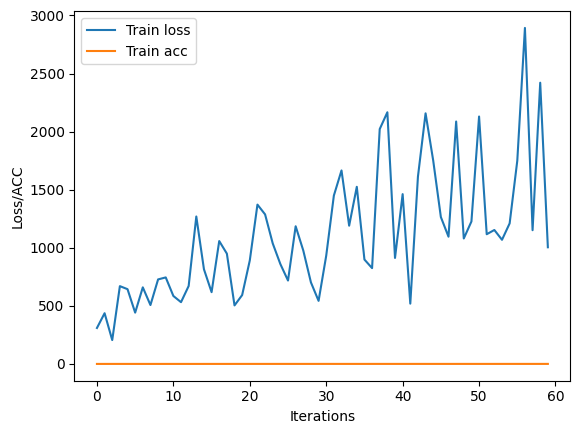

In [77]:
loss_list = []
acc_list = []

for epoch in range(num_epochs):
  correct = 0
  total = 0
  for i,(images,labels) in enumerate(train_loader):
    # 데이터 로드
    images = images.reshape(-1, input_size)
    labels = labels
    # 순전파 및 loss계산
    outputs = model(images)
    loss = criterion(outputs, labels)

    # 역전파 및 가중치 업데이트
    loss.backward()
    optimizer.step()

    # 로그 출력
    if (i+1) % 100 ==0:
      loss_list.append(loss.item())
      _,predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
      acc_list.append(correct/ total)

      print("Epoch [{}/{}] step [{}/{}], loss : {:.4f}, train_acc:{:.4f}".format(
          epoch+1 , num_epochs, i+1 , total_step, loss.item(), acc_list[-1]
      ))

# 손실 및 정확도 그래프
plt.plot(loss_list, label="Train loss")
plt.plot(acc_list, label="Train acc")
plt.xlabel("Iterations")
plt.ylabel("Loss/ACC")
plt.legend()
plt.show()